In [ ]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dask import compute
from zipfile import ZipFile
from google.colab import drive
import os
from tqdm.notebook import tqdm
drive.mount('/content/drive', force_remount=True)
drivepath = '/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/'

Mounted at /content/drive


# Tract Data

## Importing data

In [ ]:
filepath = '/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/Zip-to-tracts/ziptract.xlsx'
data = pd.read_excel(filepath)

In [ ]:
data.head()

,ZIP,TRACT,USPS_ZIP_PREF_CITY,USPS_ZIP_PREF_STATE,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,501,36103158607,HOLTSVILLE,NY,0.000000,1.000000,0.000000,1.000000
1,601,72001956800,ADJUNTAS,PR,0.014530,0.012469,0.042683,0.015121
2,601,72113071700,ADJUNTAS,PR,0.158291,0.199501,0.128049,0.160094
3,601,72001956600,ADJUNTAS,PR,0.180513,0.351621,0.378049,0.196259
4,601,72001956700,ADJUNTAS,PR,0.646667,0.436409,0.451220,0.628527


In [ ]:
data.tail()

,ZIP,TRACT,USPS_ZIP_PREF_CITY,USPS_ZIP_PREF_STATE,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
188841,99925,2198000200,KLAWOCK,AK,1.0,0.0,1.0,1.0
188842,99926,2198940100,METLAKATLA,AK,1.0,0.0,1.0,1.0
188843,99927,2198000100,POINT BAKER,AK,0.0,0.0,1.0,1.0
188844,99928,2130000101,WARD COVE,AK,0.0,0.0,1.0,1.0
188845,99929,2275000300,WRANGELL,AK,1.0,1.0,1.0,1.0


In [ ]:
filepath2 = '/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/NRI_Table_CensusTracts/NRI_Table_CensusTracts.csv'
data2 = pd.read_csv(filepath2)

In [ ]:
data2.tail()

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,TRACT,...,WNTW_EALS,WNTW_EALR,WNTW_ALRB,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_NPCTL,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER
85149,85150,T78030960800,Virgin Islands,VI,78,St. Thomas,Island,30,78030,960800,...,0.0,No Expected Annual Losses,0.0,0.0,0.0,0.0,NaN,NaN,Insufficient Data,March 2023
85150,85151,T78030960900,Virgin Islands,VI,78,St. Thomas,Island,30,78030,960900,...,0.0,No Expected Annual Losses,0.0,0.0,0.0,0.0,NaN,NaN,Insufficient Data,March 2023
85151,85152,T78030961000,Virgin Islands,VI,78,St. Thomas,Island,30,78030,961000,...,0.0,No Expected Annual Losses,0.0,0.0,0.0,0.0,NaN,NaN,Insufficient Data,March 2023
85152,85153,T78030961100,Virgin Islands,VI,78,St. Thomas,Island,30,78030,961100,...,0.0,No Expected Annual Losses,0.0,0.0,0.0,0.0,NaN,NaN,Insufficient Data,March 2023
85153,85154,T78030961200,Virgin Islands,VI,78,St. Thomas,Island,30,78030,961200,...,0.0,No Expected Annual Losses,0.0,0.0,0.0,0.0,NaN,NaN,Insufficient Data,March 2023


## Merging Data

In [ ]:
data = data.rename(columns={'TRACT': 'TRACTFIPS'})

In [ ]:
merged = data2.merge(data,how='left',on='TRACTFIPS')

In [ ]:
merged['ZIP'].describe()

count    187106.000000
mean      50178.233247
std       28091.232373
min         501.000000
25%       28138.000000
50%       48116.000000
75%       75223.000000
max       99929.000000
Name: ZIP, dtype: float64

In [ ]:
merged['ZIP'].isna().sum()

1146

In [ ]:
# 1000 rows didn't get merged which is prettty weird

In [ ]:
#max zipcode should be 99950, but not really important ig

In [ ]:
merged[merged['ZIP'].isna()]

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,TRACT,...,WNTW_RISKS,WNTW_RISKR,NRI_VER,ZIP,USPS_ZIP_PREF_CITY,USPS_ZIP_PREF_STATE,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
368,144,T01015981903,Alabama,AL,1,Calhoun,County,15,1015,981903,...,13.792037,Very Low,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3362,1297,T01117980100,Alabama,AL,1,Shelby,County,117,1117,980100,...,13.890739,Very Low,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4201,1618,T04001944202,Arizona,AZ,4,Apache,County,1,4001,944202,...,63.337773,Relatively Moderate,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4202,1619,T04001944301,Arizona,AZ,4,Apache,County,1,4001,944301,...,66.874376,Relatively Moderate,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4205,1622,T04001944902,Arizona,AZ,4,Apache,County,1,4001,944902,...,72.220901,Relatively Moderate,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188201,85110,T72151950900,Puerto Rico,PR,72,Yabucoa,Municipio,151,72151,950900,...,NaN,Insufficient Data,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188206,85115,T72153750101,Puerto Rico,PR,72,Yauco,Municipio,153,72153,750101,...,NaN,Insufficient Data,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188221,85129,T78010970400,Virgin Islands,VI,78,St. Croix,Island,10,78010,970400,...,NaN,Insufficient Data,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188241,85147,T78030960500,Virgin Islands,VI,78,St. Thomas,Island,30,78030,960500,...,NaN,Insufficient Data,March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## First 3 zip

In [ ]:
merged['Zip3'] = np.floor(merged['ZIP']/100)

In [ ]:
merged['Zip3'].value_counts()

219

## Data Exploration

<Axes: >

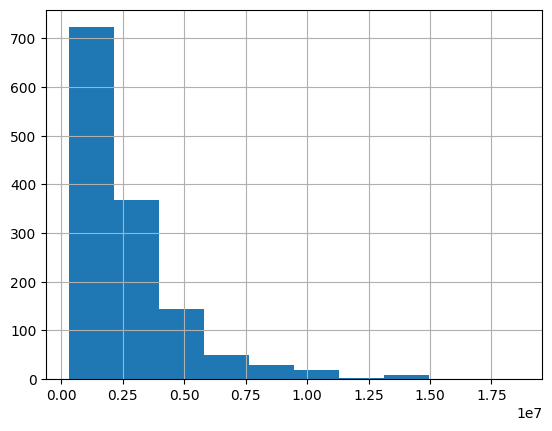

In [ ]:
merged[merged['Zip3']==770]['RISK_VALUE'].hist()

<Axes: xlabel='Zip3', ylabel='RISK_SCORE'>

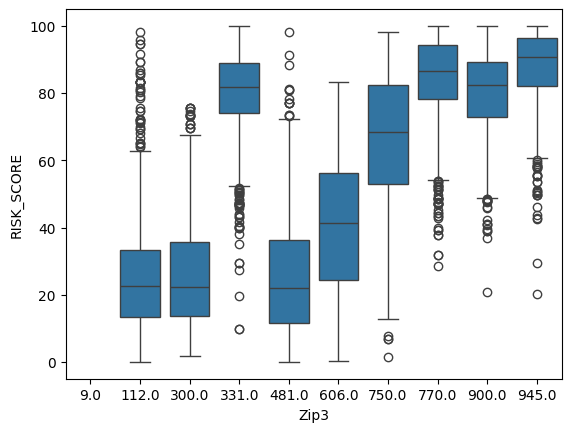

In [ ]:
top_10_zip3 = merged['Zip3'].value_counts().nlargest(10).index

# Filter your DataFrame to include only the rows with these top 10 categories
filtered_data = merged[merged['Zip3'].isin(top_10_zip3)]

# Now, create the box plot using the filtered data
sns.boxplot(x='Zip3', y='RISK_SCORE', data=filtered_data)

In [ ]:
y = merged['Zip3'].value_counts()
print(y)

Zip3
770.0    1341
900.0    1211
606.0    1181
112.0    1112
300.0    1065
         ... 
509.0       1
888.0       1
399.0       1
459.0       1
55.0        1
Name: count, Length: 901, dtype: int64


<Axes: >

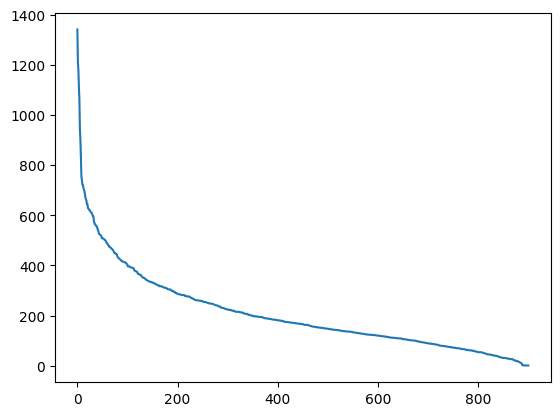

In [ ]:
y.reset_index()['count'].plot()


<Axes: >

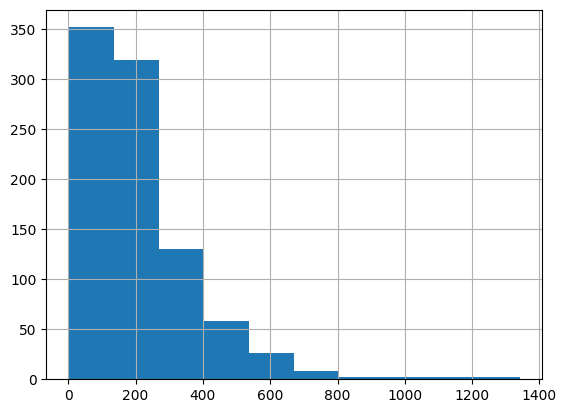

In [ ]:
y.reset_index()['count'].hist()

## Saving the data

In [ ]:
merged.to_csv('/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/NRI_Table_CensusTracts/census_merged.csv')

In [ ]:
merged = pd.read_csv('/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/NRI_Table_CensusTracts/census_merged.csv')

# County Data

## Loading Dataset

In [ ]:
filepath = '/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/Zip-to-tracts/zipcounty.xlsx'
data3 = pd.read_excel(filepath)

In [ ]:
filepath4 = '/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/NRI_Table_CensusTracts/NRI_Table_Counties.csv'
data4 = pd.read_csv(filepath4)

In [ ]:
data3.head()

,ZIP,COUNTY,USPS_ZIP_PREF_CITY,USPS_ZIP_PREF_STATE,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,501,36103,HOLTSVILLE,NY,0.000000,1.000000,0.000000,1.000000
1,601,72113,ADJUNTAS,PR,0.158291,0.199501,0.128049,0.160094
2,601,72001,ADJUNTAS,PR,0.841709,0.800499,0.871951,0.839906
3,602,72003,AGUADA,PR,0.999410,0.998989,1.000000,0.999389
4,602,72117,AGUADA,PR,0.000590,0.000000,0.000000,0.000535


In [ ]:
data4.head()

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,...,WNTW_EALS,WNTW_EALR,WNTW_ALRB,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_NPCTL,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,15.784587,Very Low,2.687716e-07,7.410082e-09,8.725777e-06,10.461158,8494.906508,12.217626,Very Low,March 2023
1,2,C01003,Alabama,AL,1,Baldwin,County,3,1003,231365,...,56.205509,Relatively Moderate,1.268231e-09,2.287120e-08,1.548360e-07,13.339523,65619.701638,52.083996,Relatively Low,March 2023
2,3,C01005,Alabama,AL,1,Barbour,County,5,1005,25160,...,18.632002,Relatively Low,5.788050e-07,2.347236e-08,7.606598e-07,16.125039,15501.730335,19.535476,Very Low,March 2023
3,4,C01007,Alabama,AL,1,Bibb,County,7,1007,22239,...,13.308573,Very Low,9.014679e-07,1.270300e-08,1.202015e-05,16.991643,7496.186940,11.104041,Very Low,March 2023
4,5,C01009,Alabama,AL,1,Blount,County,9,1009,58992,...,23.645930,Relatively Low,5.268425e-07,1.482016e-08,2.002965e-07,12.039616,17175.160729,21.444480,Very Low,March 2023


## Merging datasets

In [ ]:
data4['COUNTYFIPS'].describe()

count    3231.000000
mean      102.679356
std       106.549652
min         1.000000
25%        35.000000
50%        79.000000
75%       133.000000
max       840.000000
Name: COUNTYFIPS, dtype: float64

In [ ]:
data3 = data3.rename(columns={'COUNTY': 'STCOFIPS'})

In [ ]:
merger = data4.merge(data3,how='left',on='STCOFIPS')

In [ ]:
merger.head()

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,...,WNTW_RISKS,WNTW_RISKR,NRI_VER,ZIP,USPS_ZIP_PREF_CITY,USPS_ZIP_PREF_STATE,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,12.217626,Very Low,March 2023,36003.0,AUTAUGAVILLE,AL,1.000000,1.000000,1.000000,1.000000
1,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,12.217626,Very Low,March 2023,36006.0,BILLINGSLEY,AL,0.698473,0.555556,0.555556,0.693727
2,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,12.217626,Very Low,March 2023,36008.0,BOOTH,AL,1.000000,1.000000,0.000000,1.000000
3,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,12.217626,Very Low,March 2023,36022.0,DEATSVILLE,AL,0.366119,0.279661,0.266667,0.364408
4,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,12.217626,Very Low,March 2023,36051.0,MARBURY,AL,0.651847,0.757576,1.000000,0.655333


## Missing Values

In [ ]:
merger['ZIP'].isna().sum()

10

In [ ]:
merger['ZIP'].dropna(inplace=True)

## First 3 codes and data Exploration

In [ ]:
merger['Zip3'] = np.floor(merger['ZIP']/100)

In [ ]:
y = merger['Zip3'].value_counts()

In [ ]:
merger.describe()

,OID_,STATEFIPS,COUNTYFIPS,STCOFIPS,POPULATION,BUILDVALUE,AGRIVALUE,AREA,RISK_VALUE,RISK_SCORE,...,WNTW_ALRA,WNTW_ALR_NPCTL,WNTW_RISKV,WNTW_RISKS,ZIP,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO,Zip3
count,54049.000000,54049.000000,54049.000000,54049.000000,5.404900e+04,5.404900e+04,5.404900e+04,54049.000000,5.370400e+04,53704.000000,...,5.404900e+04,54049.000000,5.370400e+04,53704.000000,54039.000000,54039.000000,54039.000000,54039.000000,54039.000000,54039.000000
mean,1549.939740,30.032896,89.192788,30122.088864,4.231102e+05,7.381548e+10,1.851542e+08,1381.525234,1.326947e+08,63.456688,...,6.380966e-06,42.241716,2.694388e+05,54.809690,49880.408705,0.651807,0.660375,0.657173,0.723440,498.370806
std,911.660551,15.480991,89.700041,15492.977819,1.160642e+06,1.836002e+11,4.613624e+08,4383.919633,5.675646e+08,28.928723,...,1.546194e-05,28.677383,5.929844e+05,30.955188,26165.822865,0.437070,0.447418,0.460361,0.405575,261.667138
min,1.000000,1.000000,1.000000,1001.000000,6.400000e+01,5.072480e+07,0.000000e+00,2.067115,3.574127e+04,0.031817,...,0.000000e+00,0.000000,0.000000e+00,0.000000,501.000000,0.000000,0.000000,0.000000,0.000027,5.000000
25%,743.000000,18.000000,31.000000,18089.000000,2.143800e+04,4.834413e+09,2.651652e+07,499.014261,4.770840e+06,40.343621,...,2.248352e-07,16.248839,2.333062e+04,27.839644,28777.500000,0.072457,0.033898,0.000000,0.283078,287.000000
50%,1584.000000,29.000000,71.000000,29201.000000,6.484500e+04,1.353545e+10,7.859616e+07,719.886046,1.148057e+07,68.819599,...,1.620970e-06,39.492417,7.855629e+04,57.461024,49616.000000,0.988651,1.000000,1.000000,1.000000,496.000000
75%,2280.000000,42.000000,119.000000,42069.000000,3.128220e+05,5.792957e+10,1.872694e+08,1104.332136,4.724056e+07,90.486796,...,4.540106e-06,65.769112,2.514508e+05,83.232580,70784.500000,1.000000,1.000000,1.000000,1.000000,707.000000
max,3231.000000,78.000000,840.000000,78030.000000,1.000571e+07,1.517716e+12,6.586834e+09,149363.640223,5.326193e+09,100.000000,...,2.734689e-04,100.000000,8.794372e+06,100.000000,99929.000000,1.000000,1.000000,1.000000,1.000000,999.000000


<Axes: xlabel='Zip3', ylabel='RISK_VALUE'>

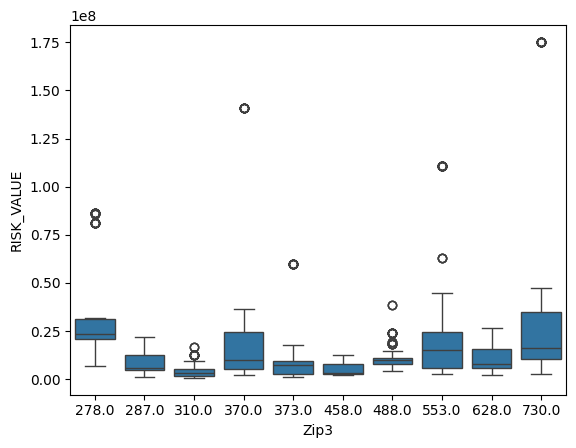

In [ ]:
top_10_zip3 = merger['Zip3'].value_counts().nlargest(10).index

# Filter your DataFrame to include only the rows with these top 10 categories
filtered_data = merger[merger['Zip3'].isin(top_10_zip3)]

# Now, create the box plot using the filtered data
sns.boxplot(x='Zip3', y='RISK_VALUE', data=filtered_data)

<Axes: >

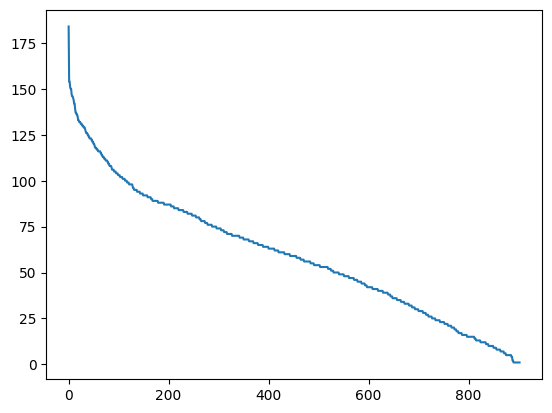

In [ ]:
y.reset_index()['count'].plot()

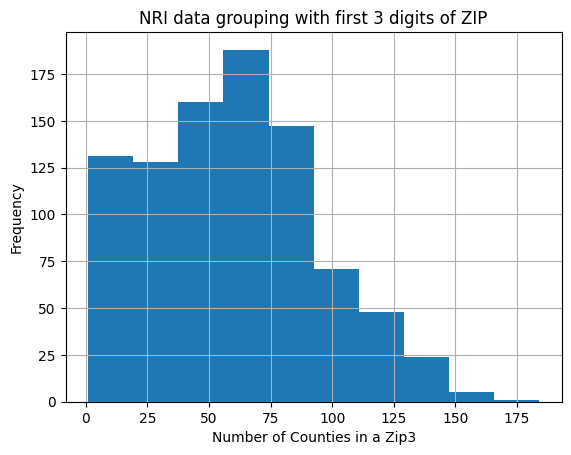

In [ ]:
y.reset_index()['count'].hist()
plt.xlabel('Number of Counties in a Zip3')
plt.ylabel('Frequency')
plt.title('NRI data grouping with first 3 digits of ZIP')

# Display the plot
plt.show()

## Saving the data

In [ ]:
merger.to_csv('/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/NRI_Table_CensusTracts/countynri')

In [ ]:
merger = pd.read_csv('/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/NRI_Table_CensusTracts/countynri')

<Axes: >

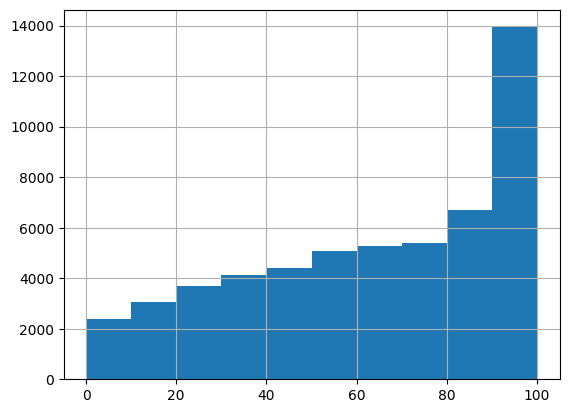

In [ ]:
merger['EAL_SCORE'].hist()

## Grouping Overall Risk

In [ ]:
grouped = merger[['RISK_VALUE','RISK_SCORE','EAL_VALT','EAL_SCORE','Zip3']].groupby(by='Zip3').mean()

In [ ]:
grouped.head()

,RISK_VALUE,RISK_SCORE,EAL_VALT,EAL_SCORE
,mean,mean,mean,mean
Zip3,,,,
5.0,1.660464e+08,97.136494,1.791859e+08,97.895388
6.0,NaN,NaN,3.982800e+07,83.775063
7.0,NaN,NaN,6.020292e+07,85.981047
8.0,NaN,NaN,2.963575e+07,80.260669
9.0,NaN,NaN,1.930905e+08,95.654970


In [ ]:
tmp = merger.filter(regex='EALT|EALS|RISKV|RISKS|Zip3')

In [ ]:
tmp = tmp.groupby(by='Zip3').mean()
grouped = pd.concat([grouped, tmp], axis=1)

In [ ]:
# Define a function to calculate deciles
def calc_decile(q):
    return lambda x: np.percentile(x, q)

# Define deciles to calculate
deciles_to_calc = [10, 20, 30, 40, 50, 60, 70, 80, 90]

cols = ['RISK_SCORE','EAL_SCORE','Zip3']

# Calculate deciles separately using quantile function
for decile in deciles_to_calc:
    decile_function = calc_decile(decile)
    deciles = merger[cols].groupby('Zip3').agg(decile_function)
    # Rename columns to distinguish them
    deciles.columns = [f'Decile_{decile}_{col}' for col in deciles.columns]
    # Merge deciles with grouped dataframe
    grouped = pd.concat([grouped, deciles], axis=1)

# Reset index
#grouped.reset_index(inplace=True)
grouped.head()

,RISK_VALUE,RISK_SCORE,EAL_VALT,EAL_SCORE,AVLN_EALT,AVLN_EALS,AVLN_RISKV,AVLN_RISKS,CFLD_EALT,CFLD_EALS,...,Decile_50_RISK_SCORE,Decile_50_EAL_SCORE,Decile_60_RISK_SCORE,Decile_60_EAL_SCORE,Decile_70_RISK_SCORE,Decile_70_EAL_SCORE,Decile_80_RISK_SCORE,Decile_80_EAL_SCORE,Decile_90_RISK_SCORE,Decile_90_EAL_SCORE
Zip3,,,,,,,,,,,,,,,,,,,,,
5.0,1.660464e+08,97.136494,1.791859e+08,97.895388,NaN,NaN,NaN,NaN,1.398643e+07,97.264957,...,97.136494,97.895388,97.136494,97.895388,97.136494,97.895388,97.136494,97.895388,97.136494,97.895388
6.0,NaN,NaN,3.982800e+07,83.775063,NaN,NaN,NaN,NaN,4.866552e+05,39.741051,...,NaN,86.320025,NaN,88.641288,NaN,90.126896,NaN,94.552770,NaN,95.295574
7.0,NaN,NaN,6.020292e+07,85.981047,NaN,NaN,NaN,NaN,1.416863e+06,40.346764,...,NaN,87.527081,NaN,88.207985,NaN,89.724543,NaN,96.100279,NaN,97.431136
8.0,NaN,NaN,2.963575e+07,80.260669,NaN,NaN,NaN,NaN,1.391990e+06,76.904084,...,NaN,88.300836,NaN,89.736924,NaN,90.095946,NaN,90.095946,NaN,90.095946
9.0,NaN,NaN,1.930905e+08,95.654970,NaN,NaN,NaN,NaN,6.791058e+06,65.726496,...,NaN,97.554937,NaN,97.709687,NaN,99.319096,NaN,99.319096,NaN,99.319096


## Saving the Data

In [ ]:
grouped.to_csv('/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/NRI_Table_CensusTracts/countygrouped')

In [ ]:
grouped = pd.read_csv('/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/NRI_Table_CensusTracts/countygrouped')

# RATINGS

In [ ]:
tmp = merger.filter(regex='RATNG|RISKR|EALR|Zip3')

In [ ]:
uni_vals = list(tmp.iloc[:,:-1].stack().unique())

In [ ]:
uni_vals

['Relatively Low',
 'Very Low',
 'Relatively Moderate',
 'Not Applicable',
 'No Expected Annual Losses',
 'No Rating',
 'Relatively High',
 'Very High',
 'Insufficient Data',
 'Data Unavailable']

In [ ]:
encoder = dict(zip(uni_vals, [2,1,3,0,0,0,4,5,0,0]))

In [ ]:
for i in tmp.columns[:-1]:
  tmp[i] = tmp[i].map(lambda y: encoder[y])
#tmp.head()

<ipython-input-8-f52c433330e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[i] = tmp[i].map(lambda y: encoder[y])


In [ ]:
groupedratings = tmp.groupby(by='Zip3').mean().round()

In [ ]:
groupedratings.columns

Index(['Zip3', 'RISK_RATNG', 'EAL_RATNG', 'SOVI_RATNG', 'RESL_RATNG',
       'AVLN_EALR', 'AVLN_RISKR', 'CFLD_EALR', 'CFLD_RISKR', 'CWAV_EALR',
       'CWAV_RISKR', 'DRGT_EALR', 'DRGT_RISKR', 'ERQK_EALR', 'ERQK_RISKR',
       'HAIL_EALR', 'HAIL_RISKR', 'HWAV_EALR', 'HWAV_RISKR', 'HRCN_EALR',
       'HRCN_RISKR', 'ISTM_EALR', 'ISTM_RISKR', 'LNDS_EALR', 'LNDS_RISKR',
       'LTNG_EALR', 'LTNG_RISKR', 'RFLD_EALR', 'RFLD_RISKR', 'SWND_EALR',
       'SWND_RISKR', 'TRND_EALR', 'TRND_RISKR', 'TSUN_EALR', 'TSUN_RISKR',
       'VLCN_EALR', 'VLCN_RISKR', 'WFIR_EALR', 'WFIR_RISKR', 'WNTW_EALR',
       'WNTW_RISKR'],
      dtype='object')

In [ ]:
groupedratings.to_csv('/content/drive/MyDrive/ELP Term D - Mortgage Loss Severity/Datasets and Guides/NRI_Table_CensusTracts/groupedratings')

In [ ]:
df = pd.read_parquet(f'{drivepath}/gse_model_data_merged.parquet')

In [ ]:
df['Postal Code']

0         774
1         286
2         430
3         462
4         300
         ... 
955045    503
955046    857
955047    287
955048    852
955049    481
Name: Postal Code, Length: 955050, dtype: int64

In [ ]:
tmp2 = pd.merge(df, groupedratings, left_on=['Postal Code'], right_on=['Zip3'], how='left')
tmp2.drop('Zip3', axis=1, inplace=True)
tmp2.head()

,Loan Sequence Number,First Payment Date,Delinquent Accrued Interest,Actual Loss Calculation,Original Loan-to-Value (LTV),Interest Only (I/O) Indicator,Loan Purpose,Zero Balance Code,Prepayment Penalty Mortgage (PPM) Flag,Metropolitan Statistical Area (MSA) Or Metropolitan Division,...,TRND_EALR,TRND_RISKR,TSUN_EALR,TSUN_RISKR,VLCN_EALR,VLCN_RISKR,WFIR_EALR,WFIR_RISKR,WNTW_EALR,WNTW_RISKR
0,F99Q10000144,41999,6502.48,-13469.45,89.0,N,N,3,N,,...,4.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,4.0
1,F99Q10005890,31999,1839.66,-1373.94,76.0,N,N,9,N,,...,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
2,F99Q10014577,41999,18802.52,-5870.19,94.0,N,P,9,N,18140,...,3.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0
3,F99Q10049151,51999,2779.33,-8535.40,90.0,N,P,9,N,26900,...,5.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0
4,F99Q10091305,51999,23853.40,-4847.45,76.0,N,N,9,N,12060,...,4.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,4.0


In [ ]:
groupedratings.reset_index(inplace=True)

In [ ]:
(df.isna().sum() == tmp2.isna().sum()[:193]).sum()

193

In [ ]:
tmp2.to_parquet(f'{drivepath}/gse_model_data_merged.parquet')

In [ ]:
groupedratings.fillna(0,inplace=True)